# Import des modules nécessaires

## Modules externes

In [9]:
# pour faire de beaux graphiques
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

# pour gérer les tables en Python
import pandas as pd

# pour faire d'encore plus beaux graphiques
import seaborn as sns

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

## Modules internes

In [2]:
from db import Etape, Ligne, Session, Trajet

# Récupérer les données (écarts, déjà)

In [3]:
session = Session()

ecarts = [req[0] for req in session.query(Etape.ecart).all()]

session.close()

In [4]:
print(ecarts)

[0, 251, 30, -143, 158, 101, 29, 208, 149, 939, 0, 416, 347, 56, 137, 26, 239, 33, 122, 0, 0, 0, 537, 200, -42, 257, 121, 144, -40, -43, 150, -36, -141, 28, 14, 56, 115, 0, 113, 139, 247, 244, 0, 150, 58, -34, -7, -117, 123, 120, 158, 256, 225, 0, 0, 0, -107, -204, 307, 301, 356, 47, 417, -28, 356, 634, 531, -27, 158, 9, 245, 48, -128, 6, 220, -235, -118, 39, 47, -48, 202, -7, 132, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 104, 235, 302, -2, -28, 307, 251, 232, -46, -9, 136]


# Analyse

Je vous donne quelques pistes. L'idée est d'essayer de trouver un indicateurs qui vous semble refléter la qualité de l'exploitation du réseau à cet instant, à partir de tous les écarts des bus.

Pour plus de graphiques et d'analyses statistiques, je vous conseille d'aller voir [le site de `seaborn`](https://seaborn.pydata.org/examples/).

C:\Users\pierr\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'nombre de véhicules'),
 Text(0.5,0,'retard en secondes'),
 Text(0.5,1,'Quels retards sur le réseau Irigo ?')]

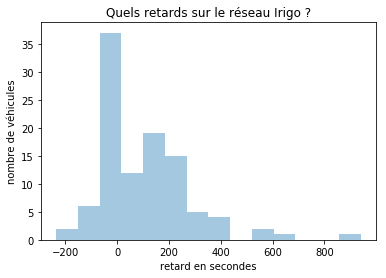

In [5]:
ax = sns.distplot(ecarts, kde=False)

ax.set(
    title="Quels retards sur le réseau Irigo ?",
    xlabel='retard en secondes',
    ylabel='nombre de véhicules'
)

Maintenant essayez de l'afficher en minutes.

Puis, réfléchissez à quel nombre pourrait refléter, en résumé, la situation : le max des retards ? la moyenne des retards ? la moyenne des valeurs absolues des retards ?

# Récupérer toutes les données

In [6]:
# Voici comment on fait un join
query = session.query(Trajet, Etape.ecart)\
               .select_from(Etape).join(Trajet)

pd.read_sql_query(query.statement, query.session.bind)

,id_trajet,id_vehicule,id_ligne,latitude,longitude,destination,ecart
0,268969766,268435910,268435464,47.493098,-0.568919,AQUAVITA VERNEAU,0
1,268513051,268435657,268435457,47.468088,-0.537383,MONPLAISIR,251
2,269233413,268435879,268435468,47.443604,-0.498395,ST AUBIN LA SALLE,30
3,269062673,268435881,268435465,47.473935,-0.545518,ESPACE ANJOU,-143
4,268939796,268435884,268435463,47.526779,-0.601802,CHU - HOPITAL,158
5,268774195,268435899,268435461,47.470024,-0.562284,CIRCULAIRE SENS A,101
6,268774159,268435987,268435461,47.474763,-0.528105,CIRCULAIRE SENS A,29
7,268578571,268436059,268435458,47.444496,-0.474375,ST SYLVAIN,208
8,268545558,268436070,268435457,47.469283,-0.557014,BELLE BEILLE,149
9,268578609,268436078,268435458,47.492567,-0.502091,ST SYLVAIN,939


Et si je veux relier ça à la ligne elle-même ? J'ai en quelque sorte besoin de jointures en chaine Etape <-> Trajet <-> Ligne. C'est pas plus compliqué !

In [7]:
# Voici comment on fait un join
query = session.query(Etape.ecart, Ligne.nom_ligne) \
               .select_from(Etape).join(Trajet).join(Ligne)

df = pd.read_sql_query(query.statement, query.session.bind)

df

,ecart,nom_ligne
0,0,PONTS CE <> AQUAVITA H. RECULEE
1,251,BELLE BEILLE <> MONPLAISIR
2,30,M-MARCILLE <> ST AUBIN LA SALLE
3,-143,ESPACE ANJOU <> EVENTARD
4,158,HOPITAL <> MONTREUIL JUIGNE
5,101,CIRCULAIRE VERNEAU GARE EUROPE
6,29,CIRCULAIRE VERNEAU GARE EUROPE
7,208,ST SYLVAIN BANCHAIS <>TRELAZE
8,149,BELLE BEILLE <> MONPLAISIR
9,939,ST SYLVAIN BANCHAIS <>TRELAZE


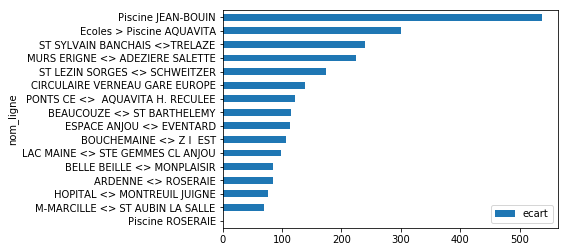

In [10]:
dft = df.pivot_table(index="nom_ligne", values="ecart",
               aggfunc=lambda x: np.mean(np.abs(x))) \
  .sort_values(by="ecart")

dft.plot.barh()

In [11]:
dft

,ecart
nom_ligne,
Piscine ROSERAIE,0.000000
M-MARCILLE <> ST AUBIN LA SALLE,69.333333
HOPITAL <> MONTREUIL JUIGNE,77.000000
ARDENNE <> ROSERAIE,84.000000
BELLE BEILLE <> MONPLAISIR,85.230769
LAC MAINE <> STE GEMMES CL ANJOU,97.666667
BOUCHEMAINE <> Z I EST,106.444444
ESPACE ANJOU <> EVENTARD,113.000000
BEAUCOUZE <> ST BARTHELEMY,115.727273


In [15]:
trace = go.Bar(
    x=dft.index,
    y=dft['ecart'],
    marker={
        'color': 'rgba(210, 105, 30, 0.5)'
    }
)

layout = go.Layout(
    title="Ecarts absolus moyens sur les lignes du réseau Irigo",
    yaxis={
        'title': "écart moyen absolu (secondes)",
    },
    xaxis={
        'title': "ligne"
    }
)

figure = go.Figure(
    data=go.Data([trace]),
    layout=layout
)

iplot(figure)